In [3]:
import qiskit as q
%matplotlib inline

In [2]:
circuit = q.QuantumCircuit(2, 2)
circuit.x(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw()

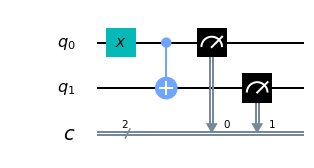

In [4]:
circuit.draw(output="mpl")

In [6]:
from qiskit import IBMQ

In [9]:
IBMQ.save_account(open("file_with_token", "r").read())

Credentials already present. Set overwrite=True to overwrite.


In [ ]:
IBMQ.load_account()

In [17]:
provider = IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "Exception: simulated!"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits.")

ibmq_qasm_simulator has 1 queued and Exception: simulated! qubits.
ibmqx2 has 44 queued and 5 qubits.
ibmq_16_melbourne has 4 queued and 15 qubits.
ibmq_vigo has 2 queued and 5 qubits.
ibmq_ourense has 3 queued and 5 qubits.
ibmq_london has 2025 queued and 5 qubits.
ibmq_burlington has 2 queued and 5 qubits.
ibmq_essex has 2 queued and 5 qubits.
ibmq_armonk has 0 queued and 1 qubits.


In [18]:
from qiskit.tools.monitor import job_monitor

In [19]:
backend = provider.get_backend("ibmq_essex")
job = q.execute(circuit, backend = backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


In [21]:
from qiskit.visualization import plot_histogram
from matplotlib import style

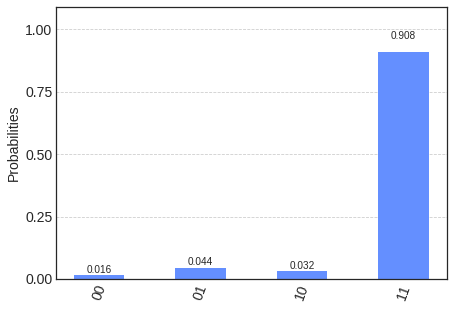

In [22]:
style.use("seaborn-white")
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])